In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
from scipy.stats import ttest_1samp, ttest_ind
from scipy.stats import norm
from scipy.stats import t

In [2]:
df = pd.read_csv('rassrochka.csv')

In [3]:
def kogorti (df3, t1, t2, qq):

    df3['date_loan'] = pd.to_datetime(df['date_loan'])
    df3['date_rassrochka'] = pd.to_datetime(df['date_rassrochka'])
    df3['delta'] = df['date_rassrochka'] - df['date_loan'] 
    df3['delta'] = df['delta'].dt.components['days']
    df3['delta'] = df['delta'].fillna(0)
    df3['> 0 day'] = [1 if x >= 0 else 0 for x in df['delta']]
    df3['< 180 day'] = 0
    df3['> 180 day'] = [1 if x > 180 else 0 for x in df['delta']]
    df3['> 360 day'] = [1 if x > 360 else 0 for x in df['delta']]
    df3['> 540 day'] = [1 if x > 540 else 0 for x in df['delta']]
    df3['> 720 day'] = [1 if x > 720 else 0 for x in df['delta']]
    df3['> 900 day'] = [1 if x > 900 else 0 for x in df['delta']]
    df3['> 1080 day'] = [1 if x > 1080 else 0 for x in df['delta']]
    df3 = df3[df3['delta']>0].groupby(pd.Grouper(key="date_loan", freq=qq)).agg({'> 0 day': 'sum', '< 180 day': 'sum'
                , '> 180 day': 'sum', '> 360 day': 'sum', '> 540 day': 'sum'
                , '> 720 day': 'sum', '> 900 day': 'sum', '> 1080 day': 'sum'}).reset_index().rename(columns={'date_loan':'Когорты', '> 0 day' : 'cnt'}) 
    df3['< 180 day'] = (df3['cnt'] / df3['cnt'])
    df3['> 180 day'] = (df3['> 180 day'] / df3['cnt'])
    df3['> 360 day'] = (df3['> 360 day'] / df3['cnt'])
    df3['> 540 day'] = (df3['> 540 day'] / df3['cnt'])
    df3['> 720 day'] = (df3['> 720 day'] / df3['cnt'])
    df3['> 900 day'] = (df3['> 900 day'] / df3['cnt'])
    df3['> 1080 day'] = (df3['> 1080 day'] / df3['cnt'])
    df3=df3.round(2)
    new = df3.T
    new.columns=new.iloc[0]
    new2=new.iloc[2:,:]
    new2
    new2.plot ()
    #добавляем подписи осей
    plt.xlabel('винтажи по 180 дней')
    plt.ylabel('доли')
    #угол наклона надписи по оси х
    #plt.xticks( rotation = 45)
    #меняю расположение легенды
    plt.legend(loc=8, bbox_to_anchor=(1.25,0.02))
    #сетка
    #plt.grid(True)
    #назначаю значения шкалы по оси у(rotation = 0 - угол наклона надписи)
    plt.yticks(np.arange(0, 1.1, step=0.1), rotation = 0);
    plt.yticks(np.arange(0, 1.1, step=0.1), rotation = 0);
    return df3

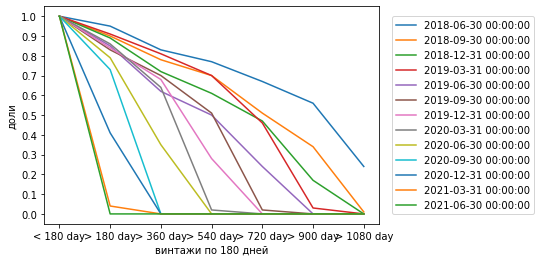

In [4]:
#  q - квартал, y -год, m - месяц
dd = kogorti (df, 'date_loan', 'date_rassrochka', 'q') 

In [5]:
dd

,Когорты,cnt,< 180 day,> 180 day,> 360 day,> 540 day,> 720 day,> 900 day,> 1080 day
0,2018-06-30,84,1.0,0.95,0.83,0.77,0.67,0.56,0.24
1,2018-09-30,102,1.0,0.90,0.78,0.70,0.51,0.34,0.01
2,2018-12-31,106,1.0,0.89,0.72,0.61,0.47,0.17,0.00
3,2019-03-31,99,1.0,0.91,0.81,0.70,0.46,0.03,0.00
4,2019-06-30,92,1.0,0.85,0.62,0.50,0.24,0.00,0.00
5,2019-09-30,88,1.0,0.83,0.70,0.51,0.02,0.00,0.00
6,2019-12-31,80,1.0,0.84,0.68,0.28,0.00,0.00,0.00
7,2020-03-31,97,1.0,0.86,0.64,0.02,0.00,0.00,0.00
8,2020-06-30,78,1.0,0.79,0.35,0.00,0.00,0.00,0.00
9,2020-09-30,86,1.0,0.73,0.00,0.00,0.00,0.00,0.00
